**K Mean Clustering**

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
#chargement de base de données iris
iris = datasets.load_iris()

In [3]:
#Stocker les données en tant que DataFrame Pandas 
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)


**Le bon nombre de cluster**

WCCS permet de mesurer la pertinence du clustering. Somme des carrés intercluster. En gros, pour chaque cluster on prend le carré de la somme des distances de chaque point par rapport au centroid. Ensuite on fait la somme de ces carrés et on ontient notre mesure. L'objectif c'est de minimiser cette valeur mais raisonnablement ... Si WCSS est trop grand c'est que je n'ai pas assez de Cluster. Si il est trop petit c'est que j'en ai trop.

In [4]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

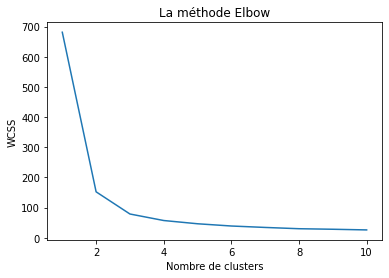

In [5]:
# Afficher la courbe de la méthode Elbow
plt.plot(range(1, 11), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')

In [6]:
#Cluster K-means
model=KMeans(n_clusters=3)
#adapter le modèle de données
model.fit(x)

KMeans(n_clusters=3)

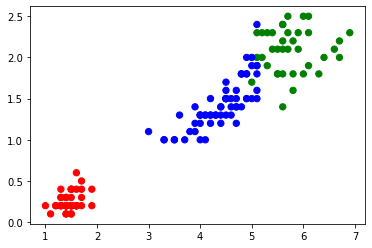

In [8]:
colormap=np.array(['red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)


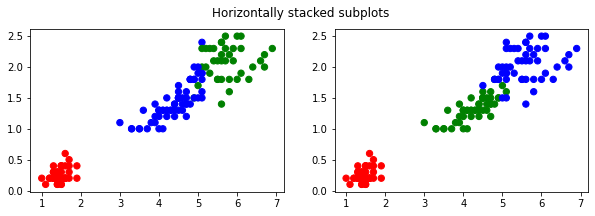

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 3))
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
ax2.scatter(x.Petal_Length, x.Petal_width,c=colormap[iris.target],s=40)

In [10]:
#from joblib import dump, load

#dump(model, "cluster_iris.joblib")

['cluster_iris.joblib']